Importing important libraries and enabling CUDA

In [1]:
import keras
import numpy as np
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Using TensorFlow backend.


In [2]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
(x_train,_), (x_test,_) = mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
print(x_train.shape)
print(x_test.shape)
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


Deep Autoencoder

In [5]:
input_img = Input(shape=(784,))
encoder = Dense(128,activation='relu')(input_img)
encoder = Dense(64,activation='relu')(encoder)
encoder = Dense(32,activation='relu')(encoder)
decoder = Dense(64,activation='relu')(encoder)
decoder = Dense(128,activation='relu')(decoder)
decoder = Dense(784,activation='sigmoid')(decoder)
deep_ae = Model(input_img,decoder)
deep_ae.compile(optimizer='adadelta',loss='binary_crossentropy')

W1006 07:39:43.942149 10484 deprecation_wrapper.py:119] From C:\Users\Vijay\Miniconda3\envs\env2\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1006 07:39:43.945256 10484 deprecation_wrapper.py:119] From C:\Users\Vijay\Miniconda3\envs\env2\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1006 07:39:43.956802 10484 deprecation_wrapper.py:119] From C:\Users\Vijay\Miniconda3\envs\env2\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1006 07:39:44.153335 10484 deprecation_wrapper.py:119] From C:\Users\Vijay\Miniconda3\envs\env2\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1006 07:39:44.189227 10484 deprecat

In [6]:
deep_ae.fit(x_train,x_train,epochs=100,batch_size=64,shuffle=True,validation_data=(x_test,x_test))

W1006 07:39:47.356310 10484 deprecation_wrapper.py:119] From C:\Users\Vijay\Miniconda3\envs\env2\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 12s 201us/step - loss: 0.2723 - val_loss: 0.2358
Epoch 2/100
60000/60000 [==============================] - 12s 201us/step - loss: 0.2108 - val_loss: 0.1863
Epoch 3/100
60000/60000 [==============================] - 15s 247us/step - loss: 0.1752 - val_loss: 0.1647
Epoch 4/100
60000/60000 [==============================] - 15s 251us/step - loss: 0.1583 - val_loss: 0.1501
Epoch 5/100
60000/60000 [==============================] - 14s 228us/step - loss: 0.1469 - val_loss: 0.1422
Epoch 6/100
60000/60000 [==============================] - 14s 227us/step - loss: 0.1402 - val_loss: 0.1349
Epoch 7/100
60000/60000 [==============================] - 14s 241us/step - loss: 0.1346 - val_loss: 0.1290
Epoch 8/100
60000/60000 [==============================] - 11s 183us/step - loss: 0.1295 - val_loss: 0.1250
Epoch 9/100
60000/60000 [==============================] - 10s 170us/step - loss: 0.12

60000/60000 [==============================] - 13s 210us/step - loss: 0.0885 - val_loss: 0.0896
Epoch 77/100
60000/60000 [==============================] - 11s 177us/step - loss: 0.0885 - val_loss: 0.0872
Epoch 78/100
60000/60000 [==============================] - 13s 209us/step - loss: 0.0883 - val_loss: 0.0958
Epoch 79/100
60000/60000 [==============================] - 13s 212us/step - loss: 0.0882 - val_loss: 0.0884
Epoch 80/100
60000/60000 [==============================] - 14s 236us/step - loss: 0.0882 - val_loss: 0.0883
Epoch 81/100
60000/60000 [==============================] - 14s 226us/step - loss: 0.0880 - val_loss: 0.0868
Epoch 82/100
60000/60000 [==============================] - 14s 232us/step - loss: 0.0879 - val_loss: 0.0880
Epoch 83/100
60000/60000 [==============================] - 13s 223us/step - loss: 0.0878 - val_loss: 0.0873
Epoch 84/100
60000/60000 [==============================] - 14s 235us/step - loss: 0.0878 - val_loss: 0.0871
Epoch 85/100
60000/60000 [======

In [7]:
output_imgs = deep_ae.predict(x_test)

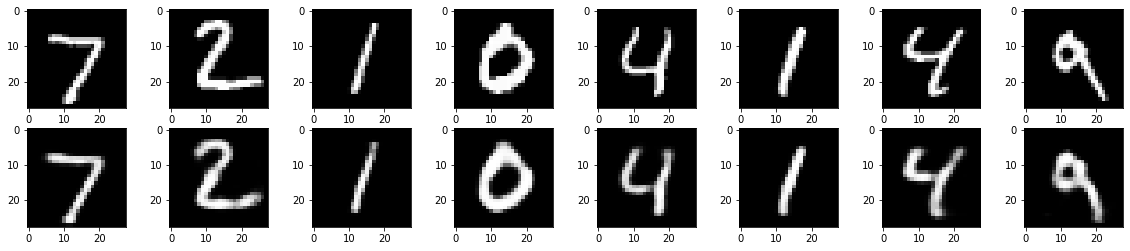

In [9]:
import matplotlib.pyplot as plt
n = 8
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(output_imgs[i].reshape(28,28))
    plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
plt.show();

Deep Convolutional Autoencoder

In [10]:
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
img_size = Input(shape=(28,28,1))
x = Conv2D(16,(3,3),activation='relu',padding='same')(img_size)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoder = MaxPooling2D((2,2),padding='same')(x)

x = Conv2D(8,(3,3),activation='relu',padding='same')(encoder)
x = UpSampling2D((2,2))(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16,(3,3),activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoder = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

cnn_ae = Model(img_size,decoder)
cnn_ae.compile(optimizer='adadelta',loss='binary_crossentropy')

W1006 08:08:40.825610 10484 deprecation_wrapper.py:119] From C:\Users\Vijay\Miniconda3\envs\env2\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1006 08:08:40.942842 10484 deprecation_wrapper.py:119] From C:\Users\Vijay\Miniconda3\envs\env2\lib\site-packages\keras\backend\tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



In [11]:
(cnn_train,_),(cnn_test,_) = mnist.load_data()
cnn_train = cnn_train.astype('float32')/255.
cnn_test = cnn_test.astype('float32')/255.
print(cnn_train.shape)
print(cnn_test.shape)
cnn_train = np.reshape(cnn_train, (len(cnn_train),28,28,1))
cnn_test = np.reshape(cnn_test, (len(cnn_test),28,28,1))
print(cnn_train.shape)
print(cnn_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
from keras.callbacks import TensorBoard
cnn_ae.fit(cnn_train,cnn_train,epochs=50,batch_size=64,shuffle=True, validation_data=(cnn_test,cnn_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 15s 258us/step - loss: 0.1883 - val_loss: 0.1445
Epoch 2/50
60000/60000 [==============================] - 13s 214us/step - loss: 0.1372 - val_loss: 0.1255
Epoch 3/50
60000/60000 [==============================] - 14s 234us/step - loss: 0.1251 - val_loss: 0.1212
Epoch 4/50
60000/60000 [==============================] - 17s 279us/step - loss: 0.1192 - val_loss: 0.1161
Epoch 5/50
60000/60000 [==============================] - 16s 261us/step - loss: 0.1155 - val_loss: 0.1171
Epoch 6/50
60000/60000 [==============================] - 15s 247us/step - loss: 0.1133 - val_loss: 0.1169
Epoch 7/50
60000/60000 [==============================] - 12s 206us/step - loss: 0.1114 - val_loss: 0.1149
Epoch 8/50
60000/60000 [==============================] - 14s 235us/step - loss: 0.1098 - val_loss: 0.1048
Epoch 9/50
60000/60000 [==============================] - 15s 258us/step - loss: 0.1080 - val_

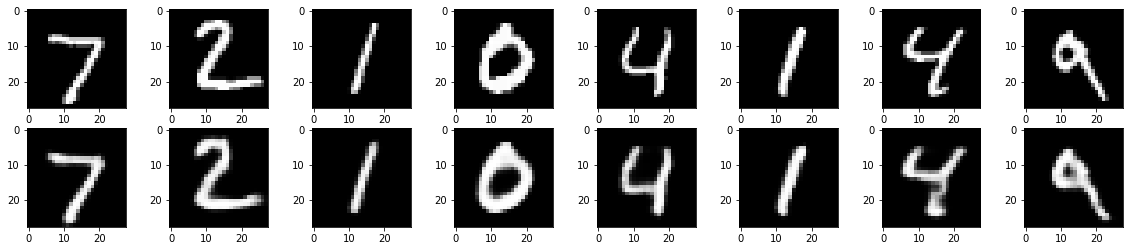

In [13]:
output_cnn = cnn_ae.predict(cnn_test)

n = 8
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(cnn_test[i].reshape(28,28))
    plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(output_cnn[i].reshape(28,28))
    plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
plt.show();  

In [23]:
from keras.layers import Flatten
flat = Flatten()(encoder)
output_layer = Dense(10,activation='softmax')(flat)
classifier_ae = Model(img_size,output_layer)
classifier_ae.compile(optimizer='adadelta',loss='categorical_crossentropy',metrics=['accuracy'])
(_,y_train),(_,y_test) = mnist.load_data()
print(y_train.shape)
print(y_test.shape)
classifier_ae.summary()

(60000,)
(10000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0  

In [21]:
for layer in classifier_ae.layers[:-1]:
    layer.trainable=False
classifier_ae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [26]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [27]:
classifier_ae.fit(cnn_train,train_labels,epochs=10,batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 9s 144us/step - loss: 1.0142 - acc: 0.7426
Epoch 2/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.4774 - acc: 0.8783
Epoch 3/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.3686 - acc: 0.9032
Epoch 4/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.3181 - acc: 0.9137
Epoch 5/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2874 - acc: 0.9214
Epoch 6/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.2670 - acc: 0.9257
Epoch 7/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.2518 - acc: 0.9293
Epoch 8/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.2398 - acc: 0.9318
Epoch 9/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.2301 - acc: 0.9343
Epoch 10/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.2220 - ac

In [29]:
classifier_ae.fit(cnn_train,train_labels,epochs=20,batch_size=64)

Epoch 1/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.1775 - acc: 0.9478
Epoch 2/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.1753 - acc: 0.9490
Epoch 3/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.1731 - acc: 0.9497
Epoch 4/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.1714 - acc: 0.9501
Epoch 5/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.1694 - acc: 0.9510
Epoch 6/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.1675 - acc: 0.9511
Epoch 7/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.1659 - acc: 0.9522
Epoch 8/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.1641 - acc: 0.9521
Epoch 9/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.1628 - acc: 0.9519
Epoch 10/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.16

In [35]:
predict_labels = classifier_ae.predict(cnn_test)
print(predict_labels)
predict_labels = predict_labels.argmax(axis=-1)
print(predict_labels)

[[9.10179168e-08 2.92644842e-08 1.25833130e-05 ... 9.99895334e-01
  4.76542880e-07 1.04350165e-05]
 [8.13652296e-05 2.06586067e-03 9.94884789e-01 ... 5.32960254e-09
  1.79820781e-04 1.22748711e-09]
 [5.42875350e-05 9.97860014e-01 5.84281981e-04 ... 2.88167881e-04
  3.02790373e-04 3.13680212e-05]
 ...
 [8.80871085e-07 3.91325813e-07 7.03207206e-07 ... 1.61869510e-04
  2.21395143e-03 5.95729519e-03]
 [1.05555795e-04 1.67535818e-05 2.13321619e-05 ... 5.15983061e-07
  2.63182409e-02 5.54012222e-05]
 [4.73526830e-04 1.57957444e-07 1.03169284e-03 ... 2.76133405e-09
  7.93173785e-06 4.79176832e-09]]
[7 2 1 ... 4 5 6]


In [38]:
scores = classifier_ae.evaluate(cnn_test,test_labels,verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.14559910087585448
Test accuracy: 0.9558


In [53]:
print("Final Labels")
print(y_test)
print(y_test.shape)
print(predict_labels)
print(predict_labels.shape)

Final Labels
[7 2 1 ... 4 5 6]
(10000,)
[7 2 1 ... 4 5 6]
(10000,)
(10000, 28, 28, 1)


In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predict_labels,labels=[0,1,2,3,4,5,6,7,8,9]))

[[ 959    0    1    2    0    6    6    2    4    0]
 [   0 1118    4    0    1    2    3    0    7    0]
 [   6    1  985   15    4    1    1    4   14    1]
 [   1    0    7  968    0   13    0    4   14    3]
 [   0    0    8    0  942    0    5    2    5   20]
 [   5    0    0   18    1  851    7    0    8    2]
 [   9    2    3    1    6   14  920    1    2    0]
 [   0    2   18   10    5    1    0  975    2   15]
 [   6    0    4   23    6    9    5    6  902   13]
 [   7    4    2   11   23    8    1    9    6  938]]


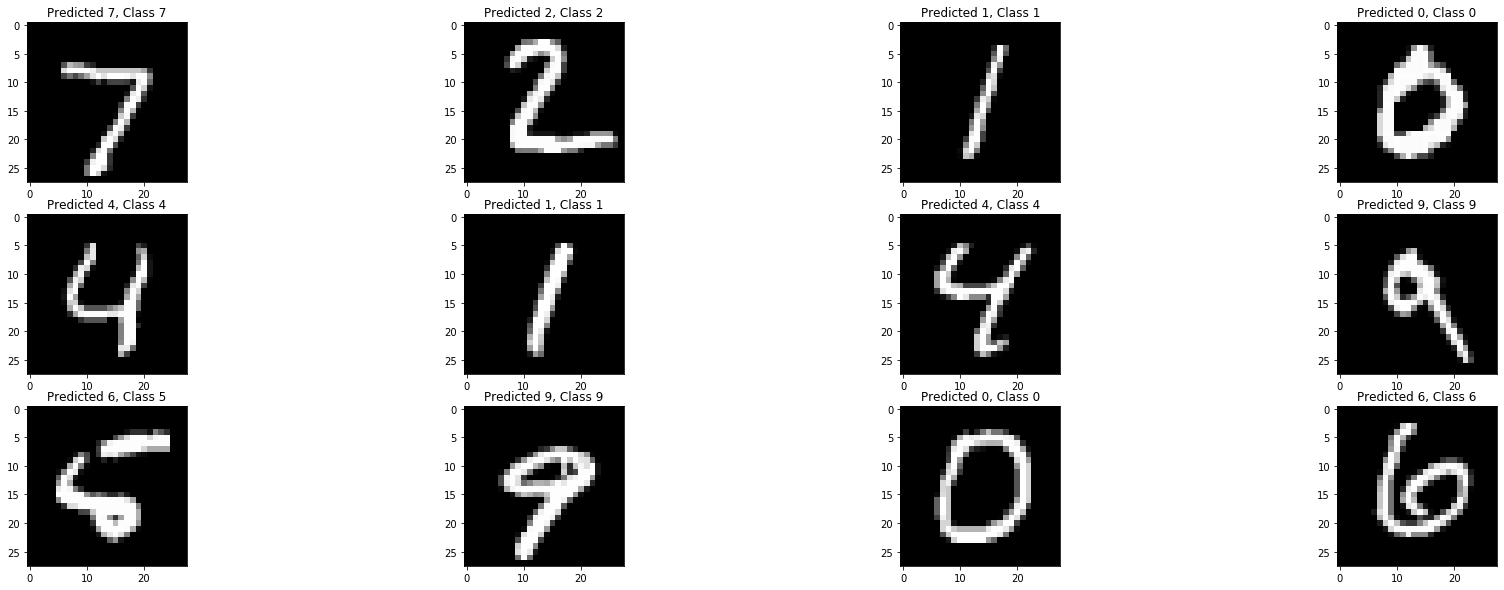

In [55]:
n = 12
plt.figure(figsize=(30,10))
for i in range(n):
    plt.subplot(3,4,i+1)
    plt.imshow(cnn_test[i].reshape(28,28),cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predict_labels[i], y_test[i]))
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
plt.show()